In [545]:
%matplotlib inline
import numpy as np
import autograd.numpy as np
from autograd import elementwise_grad as egrad
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

# Method #
In deep learning the objective function is usually the average of the loss functions for each example in the training dataset. We assume that $f_i(x)$ is the $\textbf{loss function}$ of the training dataset with $n$ examples, and index of $i$ and a parameter vector of $\textbf{x}$
$$f(x) = \frac{1}{n}\sum\limits_{i=1}^n f_i(x) $$
The goal of training a neural network is to minimize the $\textbf{error}$ between the network and the data.This $\textbf{error}$ can be minimized by taking the gradient of the loss function and setting it to zero.  Notethat  zero  gradient  is  a  minimum  because  there  is  no  maximum  $\textbf{error}$.   The  gradient  of  the  loss function axis computed as
$$\nabla f(x) = \frac{1}{n} \sum \limits_{i=1}^n\nabla f_i(x) $$

# Gradient Descent: the basic method #

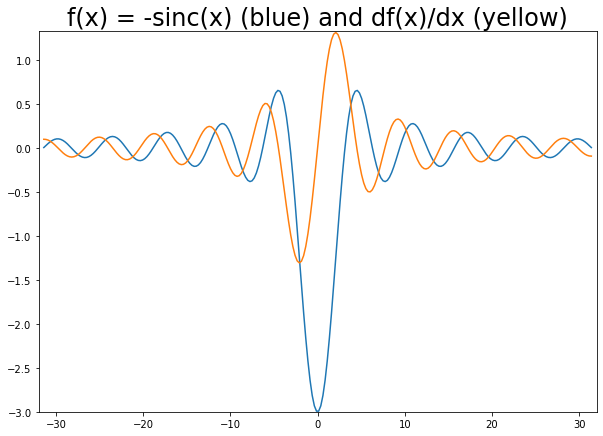

In [546]:
# domain
x = np.linspace(-31.4,31.4, 256)
#functions
f = lambda y: -3*np.sin(y) / (y)
my_fn = f
# plot objective function and gradient #
plt.figure(figsize=(10,7))
plt.title('f(x) = -sinc(x) (blue) and df(x)/dx (yellow)', fontsize=24)
for ii in range(2):
    plt.plot(x, my_fn(x))
    plt.axis([-32, 32, -3.0, 1.3222])
    plt.savefig("./sinc_grad{}.png".format(ii))
    my_fn = egrad(my_fn)

plt.show()

Red Local minimum occurs at: -1.80212086353042e-08
Number of steps: 63
Green local minimum occurs at: 14.066194058985214
Number of steps: 241


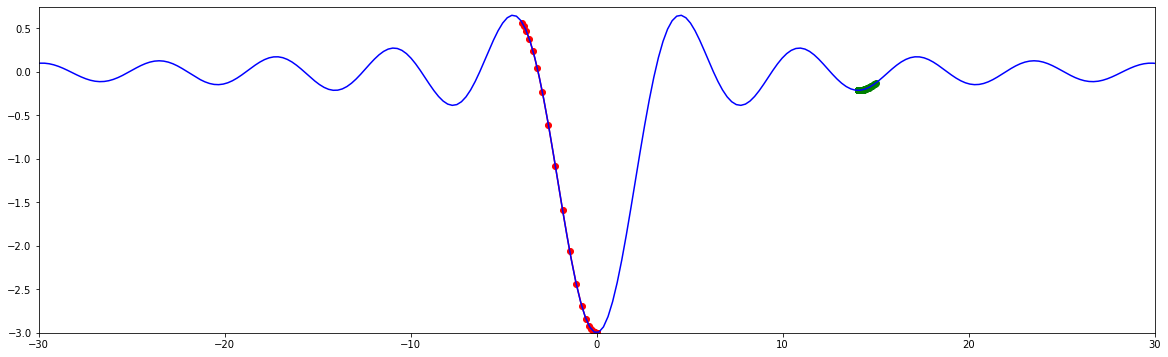

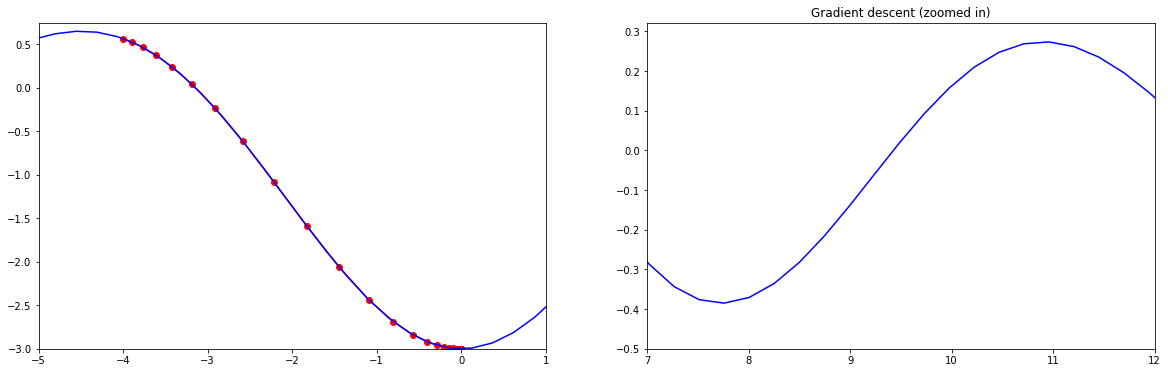

In [547]:
# domain
x = np.linspace(-31.4,31.4, 256)
#functions
sinc = lambda x: -3*np.sin(x) / (x)
sinc_prime = egrad(sinc)


# Steepest Gradient Descent
x_old = 0.0
x_new = -4.0 # The algorithm starts at x=2
x_old2 = 0.0
x_new2 = 15.0
n_k = 0.3 # step size
precision = 0.00000001


x_list, y_list = [x_new], [sinc(x_new)]
x_list2, y_list2 = [x_new2], [sinc(x_new2)]

# returns the value of the derivative of sinc function

while abs(x_new - x_old) > precision:
    x_old = x_new
    myfun = egrad(sinc)
    s_k = -myfun(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(sinc(x_new))

while abs(x_new2 - x_old2) > precision:
    x_old2 = x_new2
    myfun = egrad(sinc)
    s_k = -myfun(x_old2)
    x_new2 = x_old2 + n_k * s_k
    x_list2.append(x_new2)
    y_list2.append(sinc(x_new2))

print("Red Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))
print("Green local minimum occurs at:",x_new2)
print("Number of steps:",len(x_list2))
plt.figure(figsize=[20,6])
#
plt.scatter(x_list,y_list,c="r")
plt.scatter(x_list2,y_list2,c="g")
#
plt.plot(x_list,y_list,c="r")
plt.plot(x_list2,y_list2,c="g")
plt.axis([-32, 32, -3.0, 1.3222])
#
plt.plot(x,sinc(x), c="b")
plt.xlim([-30,30])
plt.ylim([-3,0.75])
plt.show()
plt.figure(figsize=[20,6])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.scatter(x_list2,y_list2,c="g")
plt.plot(x_list2,y_list2,c="g")
plt.plot(x_list,y_list,c="r")
plt.plot(x,sinc(x), c="b")
plt.xlim([7,12])
plt.ylim([-0.50,0.3222])
plt.title("Gradient descent (zoomed in)")
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,sinc(x), c="b")
plt.xlim([-5,1])
plt.ylim([-3,0.75])
plt.show()

Euler discovered the following identity:
$$\frac{sin(x)}{x} = \prod\limits_{n=1}^{\infty} \cos\Big(\frac{x}{2^n}\Big) $$
Now taking the product-to-sum identity of trigonometric functions we have:
$$\dots  = \frac{1}{2^{k-1}}\sum\limits_{n=1}^{2^{k-1}}\cos \Big(\frac{n-1/2}{2^{k-1}} x\Big)\hspace{3mm} \forall k \geq 1$$
$$\dots = \lim\limits_{n\rightarrow\infty}\frac{1}{n}\sum\limits_{i=1}^{n}\cos\Big(\frac{i-1/2}{n}x \Big) $$
So our objective function is now in the form:
$$J(x) = \frac{1}{n}\sum\limits_{i=1}^n J_{i,n}(x) $$
$$J_{i,n}(x) = \cos\Big(\frac{2i-1}{2n}x\Big) $$

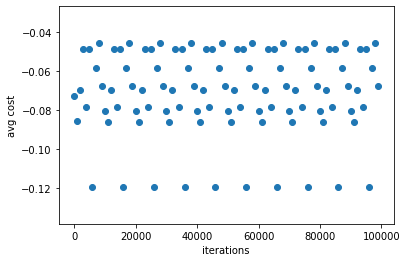

local minimum occurs here:
x:  14.276308995679273


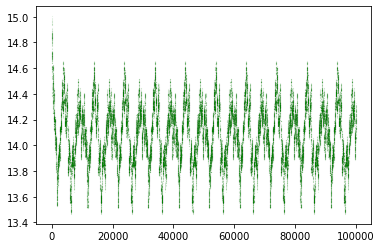

In [548]:
# standard SGD
#
from random import shuffle
theta = lambda ii,n : (2.0*float(ii) - 1.0) / (2.0*n)
n = 10000
nu = 0.03
indices = np.array([i+1 for i in range(n)]) # x 
shuffle(indices)
thetas = np.array([ theta(i,n) for i in indices]) # y
plt.show()

iter_num = 0
xx_old = 0.0
xx_new = 15.0
s_k = float("inf")
sum_cost = 0
cost_list =  []
_x = []
_y = []
for j in range(10):
    for i in range(n):
        iter_num +=1
        xx_old = xx_new
        s_k = -1*thetas[i]*np.sin(thetas[i]*xx_old) # value is positive
        xx_new = xx_old + nu*s_k
        _x.append(iter_num)
        _y.append(xx_new)
        sum_cost += -1*np.cos(thetas[i]*xx_old)
        if (i+1) % 1000 == 0:
            cost_list.append(sum_cost/1000.0)
            sum_cost = 0

iterations = [i*1000 for i in range(len(cost_list))]
plt.scatter(iterations,cost_list)
plt.title("")
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()
print("local minimum occurs here:")
print("x: ",xx_new)
plt.scatter(_x,_y,c='g',s=0.001)
plt.show()

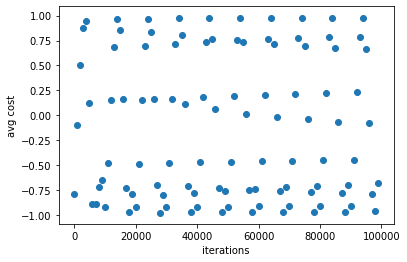

minimum occurs here:
x:  7.349540578123617


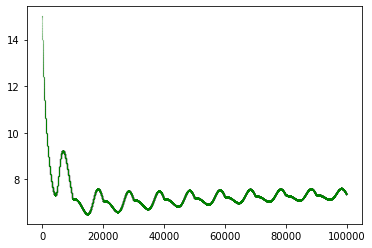

In [554]:
# ADAGRAD
#
#
#
#
from random import shuffle
theta = lambda ii,n : (2.0*float(ii) - 1.0) / (2.0*n)
#
epsilon = 1e-8
n1 = 10000
nu1 = 0.035
indices1 = np.array([i+1 for i in range(n1)]) # x 
shuffle(indices)
thetas1 = np.array([ theta(i,n1) for i in indices1]) # y
plt.show()
#
Gtii = 0
iter_num1 = 0
x_adagrad_old = 0.0
x_adagrad_new = 15.0
s_k1 = float("inf")
sum_cost1 = 0
cost_list1 =  []
_x1 = []
_y1 = []
#
for j in range(10):
    for i in range(n1):
        iter_num1 +=1
        x_adagrad_old = x_adagrad_new
        s_k1 = -1*thetas1[i]*np.sin(thetas1[i]*x_adagrad_old) # value is positive
        #
        #
        # ADAGRAD only difference between this code block and previous is marked here.
        #
        Gtii += s_k1**2 # compute sum-of-sqares of past gradients 
        #print("i:",i," Gtii",Gtii)
        alpha_k = nu1 / np.sqrt(Gtii + epsilon) # adapts step size based on history
        #print("alpha1",alpha1)
        #
        #
        #
        x_adagrad_new = x_adagrad_old + alpha_k*s_k1 # updated x
        _x1.append(iter_num1)
        _y1.append(x_adagrad_new)
        sum_cost1 += -1*np.cos(thetas1[i]*x_adagrad_old)
        if (i+1) % 1000 == 0:
            cost_list1.append(sum_cost1/1000.0)
            sum_cost1 = 0

iterations1 = [i*1000 for i in range(len(cost_list1))]
plt.scatter(iterations1,cost_list1)
plt.title("")
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()
print("minimum occurs here:")
print("x: ",x_adagrad_new)
plt.scatter(_x1,_y1,c='g',s=0.001)
plt.show()



    

In [550]:
# ADAM